In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Charger les données
file_path = "/Users/yoavcohen/Desktop/sda_mlops/data/Loan_Data.csv"
df = pd.read_csv(file_path)


In [22]:

# Afficher un aperçu des données
print("Aperçu des données :\n", df.head())
print("\nInformations sur les données :\n")
df.info()
print("\nStatistiques descriptives :\n", df.describe())



Aperçu des données :
    customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  

Informations sur les données :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data 

In [23]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :\n", df.isnull().sum())



Valeurs manquantes par colonne :
 customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


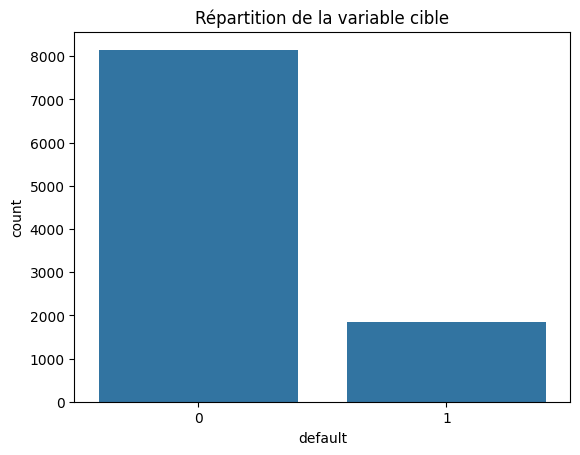

In [24]:


# Vérifier la distribution de la variable cible
sns.countplot(x=df['default'])
plt.title('Répartition de la variable cible')
plt.show()

# Séparer les features et la cible
X = df.drop(columns=['default'])
y = df['default']



In [25]:
# Normalisation des variables numériques
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Rééquilibrage des classes avec SMOTE (oversampling)
smote = SMOTE(sampling_strategy=1, random_state=42)  # On équilibre à 50% de défauts
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)



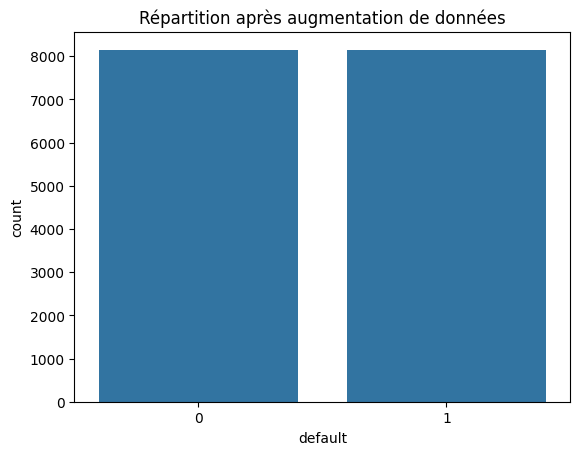

Données prétraitées et sauvegardées dans /Users/yoavcohen/Desktop/sda_mlops/data/Loan_Data_Preprocessed.csv


In [26]:
# Vérification du nouvel équilibre des classes
sns.countplot(x=y_resampled)
plt.title('Répartition après augmentation de données')
plt.show()

# Sauvegarder le fichier prétraité
output_file_path = "/Users/yoavcohen/Desktop/sda_mlops/data/Loan_Data_Preprocessed.csv"
pd.concat([X_resampled, y_resampled], axis=1).to_csv(output_file_path, index=False)

print(f"Données prétraitées et sauvegardées dans {output_file_path}")